This notebook is an EDA and modelling one combined.
What we'll be doing is performing an EDA on a netflix dataset and then creating a model that recommends movies based on the features of an input movie

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

import plotly.io as pio
pio.renderers.default = "notebook+pdf+jupyterlab"

The dataset has info on 5837 movies and TV shows, with each one having 12 features which include the director, cast, country, genre, movie decription...

In [ ]:
data = pd.read_csv('netflix.csv')
print(data.shape)
data.head()

(5837, 12)


show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
4  80213643                      Chip and Potato                         NaN   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country         date_added  release_year rating  \
0               South Korea  November 30, 2019          2019  TV-14   
1                       NaN  November 30, 2019          2019   TV-G   
2                     India  November 30, 2019          2019  TV-14   
3  France, Senegal, Belgium  November 29, 2019          2019  TV-14   
4    Canada, United Kingdom                NaN          2019   TV-Y   

    duration                                          listed_in  \
0   1 Season  International TV Shows, Korean TV Shows, Roman...   
1     67 min                Documentaries, International Movies   
2    135 min             Comedies, Dramas, International Movies   
3    106 min   Dramas, Independent Movies, International Movies   
4  2 Seasons                                           Kids' TV   

                                         description     type  
0  Brought together by meaningful meals in the pa...  TV Show  
1  From Sierra de las Minas to Esquipulas, explor...    Movie  
2  A goofy copywriter unwittingly convinces the I...    Movie  
3  Arranged to marry a rich man, young Ada is cru...    Movie  
4  Lovable pug Chip starts kindergarten, makes ne...  TV Show

I'm going to be creating extra features from the dat_added column which will be the month and year added.

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5837 non-null   int64         
 1   title         5837 non-null   object        
 2   director      3936 non-null   object        
 3   cast          5281 non-null   object        
 4   country       5410 non-null   object        
 5   date_added    5195 non-null   datetime64[ns]
 6   release_year  5837 non-null   int64         
 7   rating        5827 non-null   object        
 8   duration      5837 non-null   object        
 9   listed_in     5837 non-null   object        
 10  description   5837 non-null   object        
 11  type          5837 non-null   object        
 12  year_added    5195 non-null   float64       
 13  month_added   5195 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 638.5+ KB


The dataset contains a lot of missing data, with the director column having the most (1901 missing), the date_Addded column has 642 missing, the year_added and month_added column have the same 642 missing because we created them from the date_added column.

In [ ]:
data.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
year_added       642
month_added      642
dtype: int64

I'm going to be dropping the show_id column as it's not providing any useful info.

In [ ]:
data = data.drop(['show_id'], axis=1)

## EXPLORATORY DATA ANALYSIS (EDA)

### 1. CONTENT ADDED OVER THE YEARS

The first visualization will show a trend in the amount of movies and TV shows netflix has added over the years.

In [ ]:
tv_data = data[data['type'] == 'TV Show']
tv_data.head()
vc1 = tv_data['year_added'].value_counts().reset_index()
vc1 = vc1.rename(columns = {'index':'year_added', 'year_added':'count'})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(by=['year_added'])
vc1

year_added  count    percent
7      2008.0      1   0.079554
5      2012.0      3   0.238663
6      2013.0      3   0.238663
4      2015.0     16   1.272872
3      2016.0    148  11.774065
2      2017.0    271  21.559268
1      2018.0    339  26.968974
0      2019.0    476  37.867940

In [ ]:
movie_data = data[data['type'] == 'Movie']
movie_data.head()
vc2 = movie_data['year_added'].value_counts().reset_index()
vc2 = vc2.rename(columns = {'index':'year_added', 'year_added':'count'})
vc2['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc2 = vc2.sort_values(by=['year_added'])
vc2

year_added  count    percent
10      2008.0      1        NaN
9       2009.0      2        NaN
11      2010.0      1        NaN
6       2011.0     13   0.238663
8       2012.0      4        NaN
7       2013.0      6   0.079554
5       2014.0     19   0.238663
4       2015.0     58   1.272872
3       2016.0    264  11.774065
2       2017.0    913  21.559268
1       2018.0   1290  26.968974
0       2019.0   1367  37.867940

In [ ]:
trace1 = go.Scatter(x=vc1['year_added'], y=vc1['count'], name='TV Shows')
trace2 = go.Scatter(x=vc2['year_added'], y=vc2['count'], name='Movies')
layout = go.Layout(hovermode='closest', title='Content added over the years', xaxis=dict(title='Year'), yaxis=dict(title='Count'), template='plotly_dark')
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

As we know, netflix works with content producers and distributors to acquire licences to stream their movies on their platform, the visualization above shows that much of the investment has been in movies than TV shows with the amount of movies added increasing by more than 300% between 2016 and 2018. This is a lot compared to the 129% increase in TV shows in the same period.

### 2. CONTENT RELEASE OVER THE YEARS

The second visualization shows also a trend in the number of movies that were released between 1940 to 2020.

In [ ]:
vc3 = movie_data['release_year'].value_counts().reset_index()
vc3 = vc3.rename(columns={'index':'year', 'release_year':'count'})
vc3 = vc3.sort_values(by=['year'])

vc4 = tv_data['release_year'].value_counts().reset_index()
vc4 = vc4.rename(columns={'index':'year', 'release_year':'count'})
vc4 = vc4.sort_values(by=['year'])

trace1 = go.Bar(x=vc3['year'], y=vc3['count'], name='Movie')
trace2 = go.Bar(x=vc4['year'], y=vc4['count'], name='TV Shows')
layout = go.Layout(title='Content release by release year for movies and TV shows', xaxis=dict(title='Release year'), yaxis=dict(title='Count'), template='plotly_dark')
fig5 = go.Figure(data=[trace1, trace2], layout=layout)
fig5.show()

This bar plot shows the number of movies released each year int he dataset. From this plot we can find out Netflix has a TV Show that was released as far back as 1925, and two other movies that were released in 1942.

In [ ]:

oldest = data.sort_values("release_year", ascending = True)
oldest = oldest[oldest['duration'] != ""]
oldest = oldest[['title', "release_year", 'listed_in','country']].head()
oldest

title  release_year  \
2154   Pioneers: First Women Filmmakers*          1925   
4929                      Prelude to War          1942   
4931                The Battle of Midway          1942   
4946     WWII: Report from the Aleutians          1943   
4943  Why We Fight: The Battle of Russia          1943   

                          listed_in        country  
2154                       TV Shows            NaN  
4929  Classic Movies, Documentaries  United States  
4931  Classic Movies, Documentaries  United States  
4946                  Documentaries  United States  
4943                  Documentaries  United States

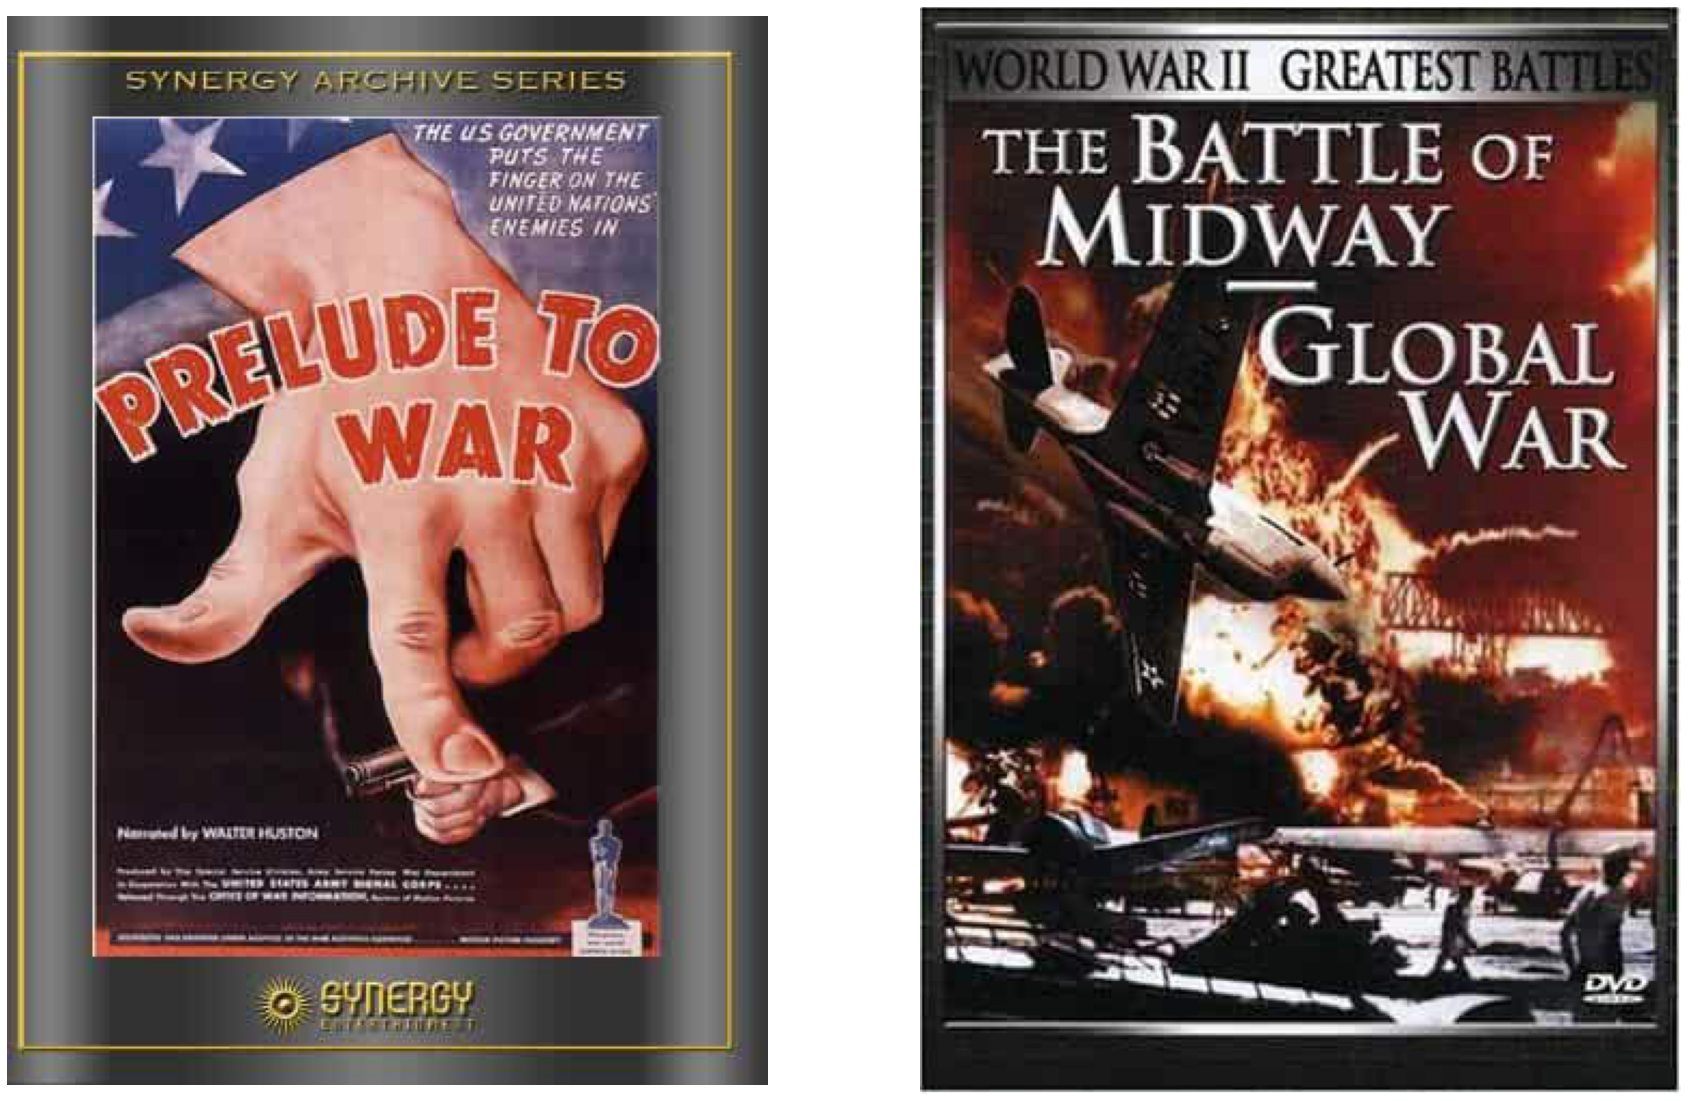

In [1]:
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://m.media-amazon.com/images/M/MV5BMTY3NTMyMDQ4NF5BMl5BanBnXkFtZTgwMjkzODgwMzE@._V1_QL50_.jpg'))
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://m.media-amazon.com/images/M/MV5BMTY3Njg3MDUxMl5BMl5BanBnXkFtZTcwMzE4MTU1MQ@@._V1_QL50_.jpg'))
plt.imshow(image)
plt.axis('off')
plt.show()

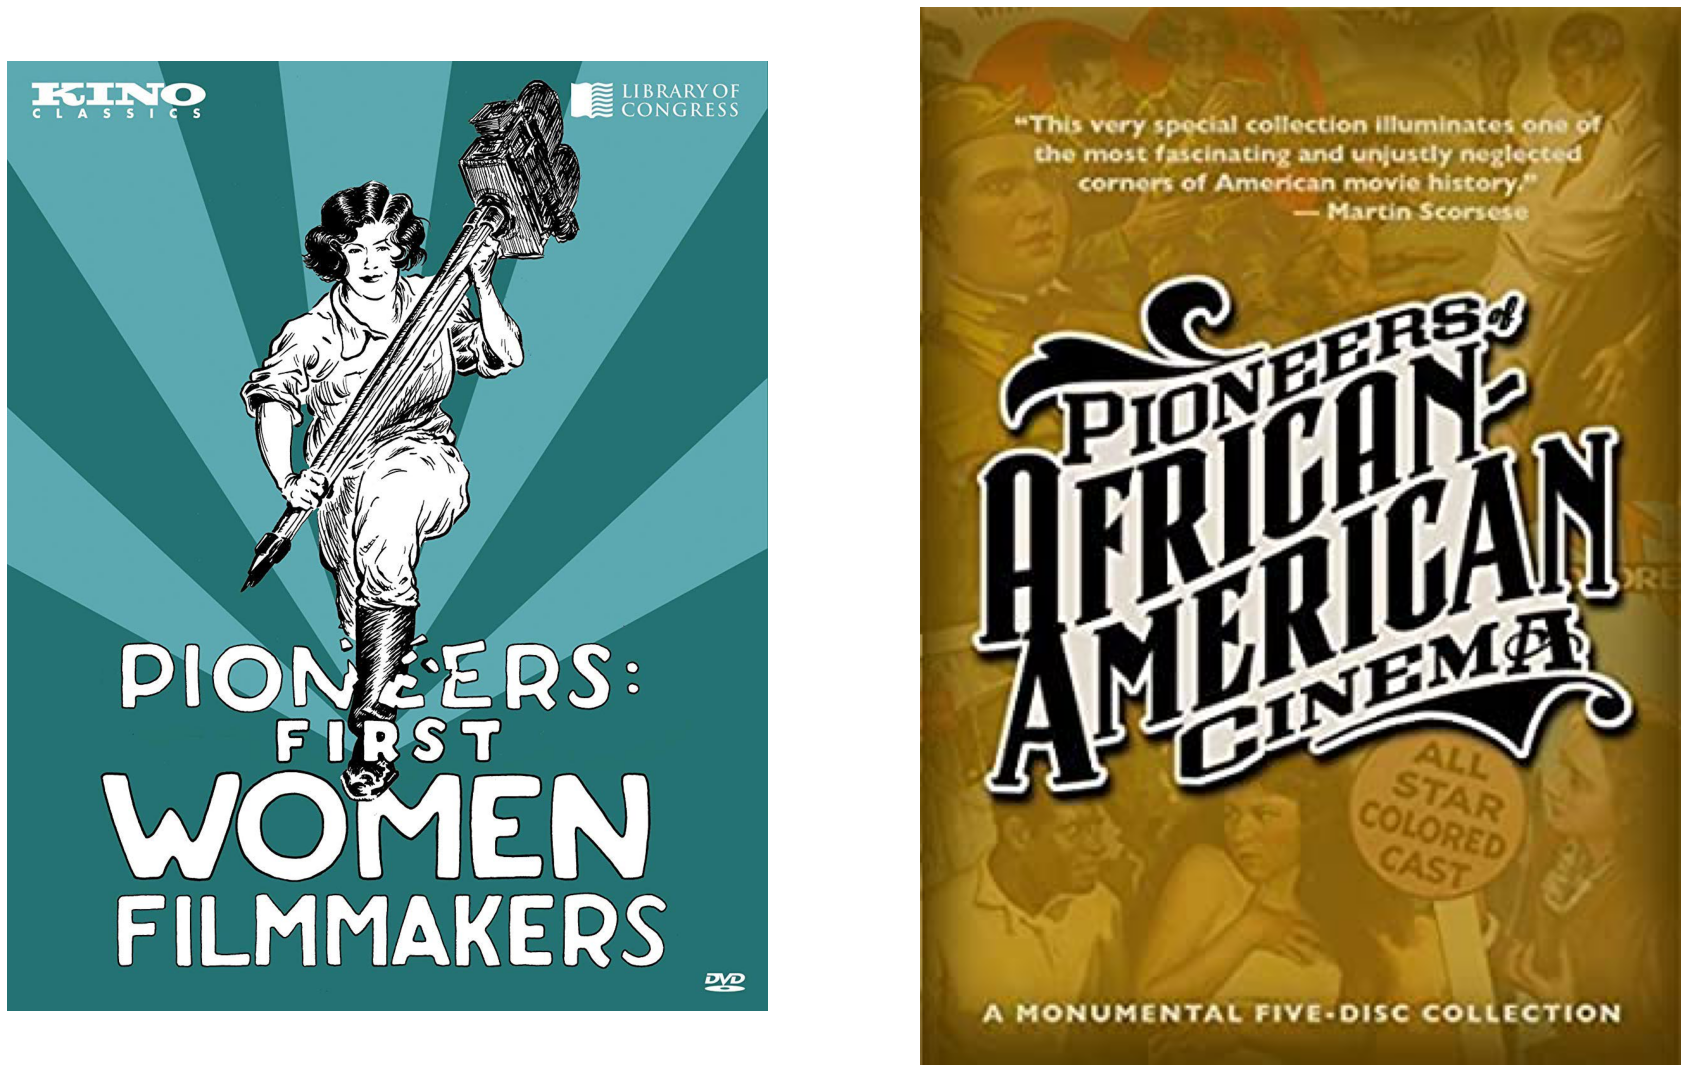

In [2]:
plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://images-na.ssl-images-amazon.com/images/I/71ddmI5x94L._SL1500_.jpg'))
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://images-na.ssl-images-amazon.com/images/I/51KqZA%2B42OL._SY445_.jpg'))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
trace10 = go.Histogram(x=data['release_year'])
layout = go.Layout(title='Overall content release by release year', xaxis=dict(title='Release year'), yaxis=dict(title='Count'), template='plotly_dark')
fig6 = go.Figure(data=[trace10], layout=layout)
fig6.show()

### 3. RATING ANALYSIS

The next set of visuals give us some insights about the ratings

In [ ]:
rc1 = data['rating'].value_counts().reset_index()
rc1 = rc1.rename(columns={'index':'rating', 'rating':'count'})
rc1 = rc1.sort_values(by=['count'])

In [ ]:
trace3 = go.Bar(x=rc1['rating'], y =rc1['count'], name='Rating')
layout = go.Layout(title='Count of the different TV Ratings', xaxis=dict(title='Rating'), yaxis=dict(title='Count'),template='plotly_dark')
fig1 = go.Figure(data=[trace3], layout=layout)
fig1.show()

As we can see, the bar plot shows TV-MA as the popular rating


TV-MA is adult content and not suitable for audiences that are under the age of 17. Content rated TV-MA contains extreme violence, explicit sexual activity and crude indecent language.

TV 14 rated content contains some material that parents would find unsuitable for children under 14 years of age. Parents are strongly urged to exercise greater care in monitoring this program and are cautioned against letting children under the age of 14 watch unattended. This program contains one or more of the following: intense violence (V), intense sexual situations (S), strong coarse language (L), or intensely suggestive dialogue (D).

In [ ]:
rc2 = movie_data['rating'].value_counts().reset_index()
rc2 = rc2.rename(columns={'index':'rating', 'rating':'count'})
rc2 = rc2.sort_values(by=['count'])

rc3 = tv_data['rating'].value_counts().reset_index()
rc3 = rc3.rename(columns={'index':'rating', 'rating':'count'})
rc3 = rc3.sort_values(by=['count'])

In [ ]:
trace4 = go.Bar(x=rc2['rating'], y =rc2['count'], name='Movie Ratings')
layout = go.Layout(title='Count of the different TV Ratings', xaxis=dict(title='Rating'), yaxis=dict(title='Count'),template='plotly_dark')

trace5 = go.Bar(x=rc3['rating'], y =rc3['count'], name='TV Ratings')
layout = go.Layout(title='Count of the different TV Ratings', xaxis=dict(title='Rating'), yaxis=dict(title='Count'),template='plotly_dark')

fig2 = go.Figure(data=[trace4,trace5], layout=layout)
fig2.show()

The bar plot compares counts for each rating for TV shows and Movies. TV-MA rated TV shows more than TV-14 rated content by just 11.

And as expected, TV-MA rated movies are more than the TV shows as well because movies are more than TV shows

In [ ]:
nc = data[data['rating'] == 'NC-17']
ur = data[data['rating'] == 'UR']
tvy7fv = data[data['rating'] == 'TV-Y7-FV']
gr = data[data['rating'] == 'G']
tvy = data[data['rating'] == 'TV-Y']
tvy7 = data[data['rating'] == 'TV-Y']
tvg = data[data['rating'] == 'TV-G']
pg = data[data['rating'] == 'PG']
nr = data[data['rating'] == 'NR']
pg13 = data[data['rating'] == 'PG-13']
tvpg = data[data['rating'] == 'TV-PG']
r = data[data['rating'] == 'R']
tv14 = data[data['rating'] == 'TV-14']
tvma = data[data['rating'] == 'TV-MA']

In [ ]:
def set_count_rating(df):
    df = df['release_year'].value_counts().reset_index().sort_values(by=['index'])
    return df

nc_count = set_count_rating(nc)
ur_count = set_count_rating(ur)
tvy7fv_count = set_count_rating(tvy7fv)
gr_count = set_count_rating(gr)
tvy_count = set_count_rating(tvy)
tvy7_count = set_count_rating(tvy7)
tvg_count = set_count_rating(tvg)
pg_count = set_count_rating(pg)
nr_count = set_count_rating(nr)
pg_13_count = set_count_rating(pg13)
tvpg_count = set_count_rating(tvpg)
r_count = set_count_rating(r)
tv14_count = set_count_rating(tv14)
tvma_count = set_count_rating(tvma)

In [ ]:
trace1 = go.Scatter(x=nc_count['index'], y=nc_count['release_year'], name='NC-17')
trace2 = go.Scatter(x=ur_count['index'], y=ur_count['release_year'], name='UR')
trace3 = go.Scatter(x=tvy7fv_count['index'], y=tvy7fv_count['release_year'], name='TV-Y7-FV')
trace4 = go.Scatter(x=gr_count['index'], y=gr_count['release_year'], name='G')
trace5 = go.Scatter(x=tvy_count['index'], y=tvy_count['release_year'], name='TV-Y')
trace6 = go.Scatter(x=tvy7_count['index'], y=tvy7_count['release_year'], name="TV-Y7")
trace7 = go.Scatter(x=tvg_count['index'], y=tvg_count['release_year'], name='TV-G')
trace8 = go.Scatter(x=pg_count['index'], y=pg_count['release_year'], name='PG')
trace9 = go.Scatter(x=nr_count['index'], y=nr_count['release_year'], name='NR')
trace10 = go.Scatter(x=pg_13_count['index'], y=pg_13_count['release_year'], name='PG-13')
trace11 = go.Scatter(x=tvpg_count['index'], y=tvpg_count['release_year'], name='TV-PG')
trace12 = go.Scatter(x=r_count['index'], y=r_count['release_year'], name='R')
trace13 = go.Scatter(x=tv14_count['index'], y=tv14_count['release_year'], name='TV-14')
trace14 = go.Scatter(x=tvma_count['index'], y=tvma_count['release_year'], name='TV-MA')


layout = go.Layout(hovermode='closest', title='Rating Trend over the years', xaxis=dict(title='Year'), yaxis=dict(title='Count'), template='plotly_dark')
fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, trace13, trace14], layout_xaxis_range=[2000, 2020], layout=layout)
fig.show()

This group of line plots help to show the trend in the TV-Ratings between 2000 and 2020. 

We can see that there was a sudden increase in the amount of TV-MA content produced from 2014 and TV-14 content have only progressed relatively slowly

### 4. COUNTRY ANALYSIS

In [ ]:
trace6 = go.Histogram(x=data['country'])
layout = go.Layout(title='Histogram of Countries and their count', xaxis=dict(title='Country'), yaxis=dict(title='Count'), template='plotly_dark')
fig3 = go.Figure(data=[trace6], layout=layout)
fig3.show()

The above histogram is not very informative as it contains counts of too many countries. So, we're gonna reduce it to just the top 10.

In [ ]:
country_df = data['country'].value_counts().reset_index()
country_df = country_df.rename(columns={'index':'country', 'country':'count'})
country_df = country_df.sort_values(by=['count'], ascending=False)
country_df = country_df.head(10)

In [ ]:
trace7 = go.Bar(x=country_df['country'], y=country_df['count'])
layout= go.Layout(title='Countries with the highest amount of movies', xaxis=dict(title='Country'), yaxis=dict(title='Count'), template='plotly_dark')
fig4 = go.Figure(data=[trace7], layout=layout)
fig4.show()

Yeah, this is better 

This shows that most of the content comes from U.S.A with about 1907 in total, this is about one-fifth of the dataset and the next is India with 697, next comes from U.K with 336.

### 5. GENRE ANALYSIS

The next few visualizations are going to be about the listed_in column which contains the different genres of movies listed.

In [ ]:
data.head()

title                    director  \
0                            Chocolate                         NaN   
1  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2                      The Zoya Factor             Abhishek Sharma   
3                            Atlantics                   Mati Diop   
4                      Chip and Potato                         NaN   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country date_added  release_year rating   duration  \
0               South Korea 2019-11-30          2019  TV-14   1 Season   
1                       NaN 2019-11-30          2019   TV-G     67 min   
2                     India 2019-11-30          2019  TV-14    135 min   
3  France, Senegal, Belgium 2019-11-29          2019  TV-14    106 min   
4    Canada, United Kingdom        NaT          2019   TV-Y  2 Seasons   

                                           listed_in  \
0  International TV Shows, Korean TV Shows, Roman...   
1                Documentaries, International Movies   
2             Comedies, Dramas, International Movies   
3   Dramas, Independent Movies, International Movies   
4                                           Kids' TV   

                                         description     type  year_added  \
0  Brought together by meaningful meals in the pa...  TV Show      2019.0   
1  From Sierra de las Minas to Esquipulas, explor...    Movie      2019.0   
2  A goofy copywriter unwittingly convinces the I...    Movie      2019.0   
3  Arranged to marry a rich man, young Ada is cru...    Movie      2019.0   
4  Lovable pug Chip starts kindergarten, makes ne...  TV Show         NaN   

   month_added  
0         11.0  
1         11.0  
2         11.0  
3         11.0  
4          NaN

In [ ]:
listed = data['listed_in'].value_counts().reset_index()
listed = listed.rename(columns={'index':'listed_in', 'listed_in':'count'})
listed = listed.sort_values(by=['count'], ascending=False)
listed = listed.head(10)
listed

listed_in  count
0                                     Documentaries    297
1                                   Stand-Up Comedy    265
2                      Dramas, International Movies    238
3  Dramas, Independent Movies, International Movies    170
4            Comedies, Dramas, International Movies    157
5                                          Kids' TV    153
6               Documentaries, International Movies    147
7                          Children & Family Movies    115
8                    Comedies, International Movies    113
9                Children & Family Movies, Comedies    110

The above dataframe shows the top 10 categories with documentaries coming first at a count of 297. The visualize this in a bar plot.

In [ ]:
trace = go.Bar(x=listed['listed_in'], y=listed['count'])
layout = go.Layout(title='Categories with the highest amount of frequency', xaxis=dict(title='Category'), yaxis=dict(title='Count'), template='plotly_dark')
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [ ]:
documentary = data[data['listed_in'] == 'Documentaries']
stand_up = data[data['listed_in'] == 'Stand-Up Comedy']
dram_int = data[data['listed_in'] == 'Dramas, International Movies']
dram_int_int = data[data['listed_in'] == 'Dramas, Independent Movies, International Movies']
comedy = data[data['listed_in'] == 'Comedies, Dramas, International Movies']
kids = data[data['listed_in'] == "Kid's TV"]
docu_int = data[data['listed_in'] == 'Documentaries, International Movies']
children = data[data['listed_in'] == 'Children & Family Movies']
comedy_int = data[data['listed_in'] == 'Comedies, International Movies']
fam_com = data[data['listed_in'] == 'Children & Family Movies, Comedies']

In [ ]:
values = [documentary, stand_up, dram_int, dram_int_int, comedy, kids, docu_int, children, comedy_int, fam_com]
def set_count(df):
    df = df['release_year'].value_counts().reset_index().sort_values(by=['index'])
    return df
    
documentary_count = set_count(documentary)
stand_up_count = set_count(stand_up)
dram_int_count = set_count(dram_int)
dram_int_int_count = set_count(dram_int_int)
comedy_count = set_count(comedy)
kids_count = set_count(kids)
docu_int_count = set_count(docu_int)
children_count = set_count(children)
comedy_int_count = set_count(comedy_int)
fam_com_count = set_count(fam_com)
    

In [ ]:
trace1 = go.Scatter(x=documentary_count['index'], y=documentary_count['release_year'], name='Documenatries')
trace2 = go.Scatter(x=stand_up_count['index'], y=stand_up_count['release_year'], name='Stand Up Comedy')
trace3 = go.Scatter(x=dram_int_count['index'], y=dram_int_count['release_year'], name='Drama, International Movies')
trace4 = go.Scatter(x=dram_int_int_count['index'], y=dram_int_int_count['release_year'], name='Dramas, Independent Movies, International Movies')
trace5 = go.Scatter(x=comedy_count['index'], y=comedy_count['release_year'], name='Comedy')
trace6 = go.Scatter(x=kids_count['index'], y=kids_count['release_year'], name="Kid's")
trace7 = go.Scatter(x=docu_int_count['index'], y=docu_int_count['release_year'], name='Documentaries, International Movies')
trace8 = go.Scatter(x=children_count['index'], y=children_count['release_year'], name='Children & Family Movies')
trace9 = go.Scatter(x=comedy_int_count['index'], y=comedy_int_count['release_year'], name='Comedies, International Movies')
trace10 = go.Scatter(x=fam_com_count['index'], y=fam_com_count['release_year'], name='Children & Family Movies, Comedies')



layout = go.Layout(hovermode='closest', title='Content added over the years', xaxis=dict(title='Year'), yaxis=dict(title='Count'), template='plotly_dark')
fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10], layout_xaxis_range=[2000, 2020], layout=layout)
fig.show()

The above line plot shows a trend in the various categories between the 2000 and 2020.

From here we can see that: 

(i). Drama, International Movies category was more than the Documentaries category around 2010 to 2016 and then the breakthrough came for Documentaries around 2016 as the count increased from 26 in 2015 to 67 in 2016 and then to 88 in 2017, there's probably a reason for the increase in the amount of documentaries in that period but we don't have enough info to find out.

(ii). Stand-up comedy content was the highest in 2018 

In [ ]:
data.head()

title                    director  \
0                            Chocolate                         NaN   
1  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2                      The Zoya Factor             Abhishek Sharma   
3                            Atlantics                   Mati Diop   
4                      Chip and Potato                         NaN   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country date_added  release_year rating   duration  \
0               South Korea 2019-11-30          2019  TV-14   1 Season   
1                       NaN 2019-11-30          2019   TV-G     67 min   
2                     India 2019-11-30          2019  TV-14    135 min   
3  France, Senegal, Belgium 2019-11-29          2019  TV-14    106 min   
4    Canada, United Kingdom        NaT          2019   TV-Y  2 Seasons   

                                           listed_in  \
0  International TV Shows, Korean TV Shows, Roman...   
1                Documentaries, International Movies   
2             Comedies, Dramas, International Movies   
3   Dramas, Independent Movies, International Movies   
4                                           Kids' TV   

                                         description     type  year_added  \
0  Brought together by meaningful meals in the pa...  TV Show      2019.0   
1  From Sierra de las Minas to Esquipulas, explor...    Movie      2019.0   
2  A goofy copywriter unwittingly convinces the I...    Movie      2019.0   
3  Arranged to marry a rich man, young Ada is cru...    Movie      2019.0   
4  Lovable pug Chip starts kindergarten, makes ne...  TV Show         NaN   

   month_added  
0         11.0  
1         11.0  
2         11.0  
3         11.0  
4          NaN

# Content-Based Movie Recommender System

The recommendation system would be based on the title, director, country, cast, the genre and the movie description

In [ ]:
recommender = data[['title', 'director', 'country', 'cast','listed_in', 'description']]
recommender.head()

title                    director  \
0                            Chocolate                         NaN   
1  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2                      The Zoya Factor             Abhishek Sharma   
3                            Atlantics                   Mati Diop   
4                      Chip and Potato                         NaN   

                    country  \
0               South Korea   
1                       NaN   
2                     India   
3  France, Senegal, Belgium   
4    Canada, United Kingdom   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                                           listed_in  \
0  International TV Shows, Korean TV Shows, Roman...   
1                Documentaries, International Movies   
2             Comedies, Dramas, International Movies   
3   Dramas, Independent Movies, International Movies   
4                                           Kids' TV   

                                         description  
0  Brought together by meaningful meals in the pa...  
1  From Sierra de las Minas to Esquipulas, explor...  
2  A goofy copywriter unwittingly convinces the I...  
3  Arranged to marry a rich man, young Ada is cru...  
4  Lovable pug Chip starts kindergarten, makes ne...

In [ ]:
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
recommender.dropna(inplace=True)

blanks = []  # start with an empty list

col=['title','director','country','cast','listed_in','description']
for i,col in recommender.iterrows():  # iterate over the DataFrame
    if type(col)==str:            # avoid NaN values
        if col.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

recommender.drop(blanks, inplace=True)

<ipython-input-444-74dc3a4fe1d7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
recommender['key_words'] = ''
r = Rake() 
for index, row in recommender.iterrows():
    r. extract_keywords_from_text(row['description'])
    key_words_dict_scores = r.get_word_degrees()
    row['key_words'] = list(key_words_dict_scores.keys())

<ipython-input-445-1cdd8fc0d3ff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
recommender['listed_in'] = recommender['listed_in'].map(lambda x: x.split(','))
recommender['cast'] = recommender['cast'].map(lambda x: x.split(',') [:3])
recommender['director'] = recommender['director'].map(lambda x: x.split(','))
recommender['country'] = recommender['country'].map(lambda x: x.split(','))
for index, row in recommender.iterrows():
    row['listed_in'] = [x.lower().replace(' ', '') for x in row['listed_in']]
    row['cast'] = [x.lower().replace(' ', '') for x in row['cast']]
    row['director'] = [x.lower().replace(' ', '') for x in row['director']]
    row['country'] = [x.lower().replace(' ', '') for x in row['country']]

<ipython-input-446-905e81adf2ad>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-446-905e81adf2ad>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-446-905e81adf2ad>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-446-905

In [ ]:
recommender.set_index('title', inplace=True)

In [ ]:
recommender['bag_of_words'] = ''
columns = recommender.columns
for index, row in recommender.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    row['bag_of_words'] = words
    
recommender.drop(columns = [col for col in recommender.columns if col!= 'bag_of_words'], inplace = True)
#recommender = recommender[['title', 'bag_of_words']]

<ipython-input-448-8b4c78f10d46>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
recommender.head()

bag_of_words
title                                                                                    
The Zoya Factor                         abhisheksharma india sonamkapoor dulquersalmaa...
Atlantics                               matidiop france senegal belgium mamasane amado...
Crazy people                            mosesinwang nigeria ramseynouah chigul solasob...
I Lost My Body                          jérémyclapin france hakimfaris victoiredubois ...
Kalushi: The Story of Solomon Mahlangu  mandladube southafrica thaborametsi thabomalem...

In [ ]:
count = CountVectorizer()
count_matrix = count.fit_transform(recommender['bag_of_words'])
indices = pd.Series(recommender.index)
indices[:5]

0                           The Zoya Factor
1                                 Atlantics
2                              Crazy people
3                            I Lost My Body
4    Kalushi: The Story of Solomon Mahlangu
Name: title, dtype: object

In [ ]:
# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.0855921 , 0.09759001, ..., 0.        , 0.09100315,
        0.04454354],
       [0.0855921 , 1.        , 0.0438529 , ..., 0.        , 0.16357216,
        0.12009612],
       [0.09759001, 0.0438529 , 1.        , ..., 0.        , 0.04662524,
        0.04564355],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04950738],
       [0.09100315, 0.16357216, 0.04662524, ..., 0.        , 1.        ,
        0.04256283],
       [0.04454354, 0.12009612, 0.04564355, ..., 0.04950738, 0.04256283,
        1.        ]])

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(recommender.index)[i])
        
    return recommended_movies

In [ ]:
#movie = 'Rocky'
def recommendation(movie):
    print('Because you watched', movie, '\n',
            recommendations(movie))

In [ ]:
recommendation('Bad Boys')

Because you watched Bad Boys 
 ['Bad Boys II', 'Men in Black II', 'Hellboy', 'The Do-Over', 'Bon Cop Bad Cop 2', 'Merantau', 'Small Soldiers', 'Kung Fu Yoga', 'Hell and Back', "Charlie's Angels"]


In [ ]:
recommendation('3 Idiots')

Because you watched 3 Idiots 
 ['PK', 'Pahuna', 'Hazaaron Khwaishein Aisi', 'Tanu Weds Manu', 'Saadey CM Saab', 'Khushi', 'Rang De Basanti', 'Singapore', 'Hattrick', 'Sur Sapata']


In [ ]:
recommendation('The Zoya Factor')

Because you watched The Zoya Factor 
 ['Hattrick', 'Azhar', 'Delhi 6', 'Bollywood Calling', 'Singapore', 'Iqbal', 'Ek Ladki Ko Dekha Toh Aisa Laga', 'Parmanu: The Story of Pokhran', 'PK', 'English Babu Desi Mem']


The model looks okay as it recommends similar movies based on the country, director, the genre and the description of other movies

Thank you for reading, and you could also suggest ways I can make the notebook better, I'll try to deploy the recommendation system and make use of a much larger dataset in the future.

Cheers 